In [84]:
##### Importing the nessessary libraries for the code

# For dealing with data in a tabular data
import pandas as pd
import numpy as np

# For dealing with data plotting and visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For scaling features to a specififc range (usually 0 and 1)
from sklearn.preprocessing import MinMaxScaler

# For building a logistic regression model for classification tasks
from sklearn.linear_model import LinearRegression

# For evaluating model performance 
from sklearn.metrics import mean_absolute_error, r2_score

In [85]:
# Now let's import the stock price file into the code
# The stock price file can be downloaded from websites like Kaggle, etc

df=pd.read_csv("/home/umer/Downloads/apple_stock (1).csv", skiprows=2)

# Now let's fix the names of the columns
df.columns=["Date", "Close", "High", "Low", "Open", "Volume"]

# Checking if the file was imported correctly
df.head()

,Date,Close,High,Low,Open,Volume
0,2025-06-26,201.000000,202.639999,199.460007,201.429993,50799100
1,2025-06-27,201.080002,203.220001,200.000000,201.889999,73188600
2,2025-06-30,205.169998,207.389999,199.259995,202.009995,91912800
3,2025-07-01,207.820007,210.190002,206.139999,206.669998,78788900
4,2025-07-02,212.440002,213.339996,208.139999,208.910004,67941800


In [86]:
# First let's check for any missing values

df.isnull().any()

Date      False
Close     False
High      False
Low       False
Open      False
Volume    False
dtype: bool

In [87]:
# Let's create a new column which will hold all the closing price of the previous day

df["prev_close"]=df["Close"].shift(1)
df.dropna(inplace=True)

In [88]:
# Let's also convert all the date column into the datatime
df["Date"]=pd.to_datetime(df["Date"])

# Let's set the index to the date as well
df.set_index("Date", inplace=True)

df.head()

,Close,High,Low,Open,Volume,prev_close
Date,,,,,,
2025-06-27,201.080002,203.220001,200.000000,201.889999,73188600,201.000000
2025-06-30,205.169998,207.389999,199.259995,202.009995,91912800,201.080002
2025-07-01,207.820007,210.190002,206.139999,206.669998,78788900,205.169998
2025-07-02,212.440002,213.339996,208.139999,208.910004,67941800,207.820007
2025-07-03,213.550003,214.649994,211.809998,212.149994,34955800,212.440002


In [89]:
# Let's define X and Y to train the model
X=df[["prev_close", "High", "Low", "Open", "Volume"]]
Y=df["Close"]

In [90]:
# Let's split the data into training and testing
split_index=int(len(df)*0.8)
X_Train,X_Test= X[:split_index], X[split_index:]
Y_Train,Y_Test=Y[:split_index], Y[split_index:]

In [91]:
# Now to scale and traain the model
scaler=MinMaxScaler()
X_Train_scaled=scaler.fit_transform(X_Train)
X_Test_scaled=scaler.transform(X_Test)

In [92]:
# Let's create the model
model=LinearRegression()
model.fit(X_Train_scaled, Y_Train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [93]:
# Now to predict and evaluate

Y_pred=model.predict(X_Test_scaled)

mae=mean_absolute_error(Y_Test,Y_pred)
r2=r2_score(Y_Test,Y_pred)

print(f"MAE: ${mae:.2f}")
print(f"R^2: {r2:.3f}")

MAE: $1.15
R^2: -23.813


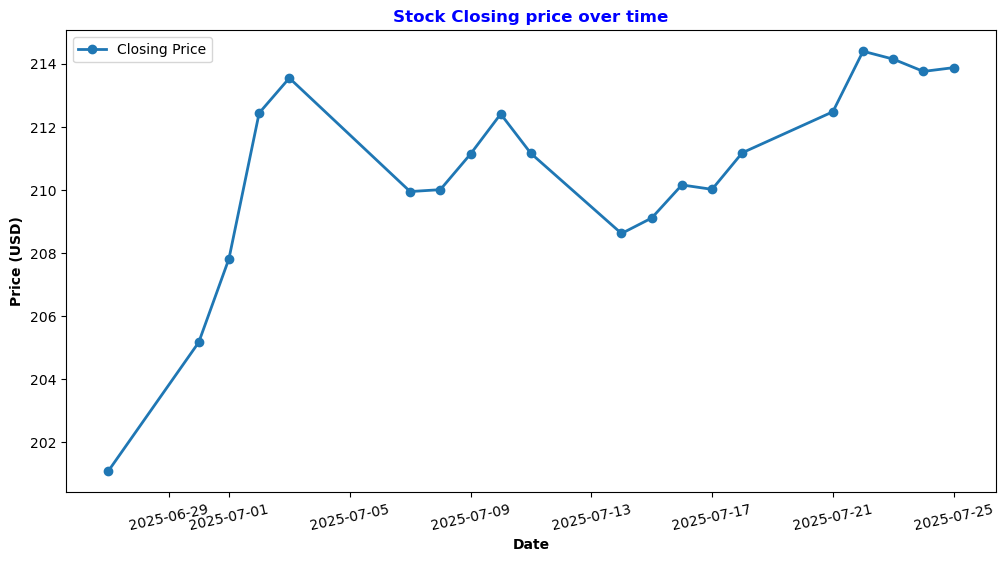

In [94]:
# Now let's create some graphs
plt.figure(figsize=(12,6))
plt.plot(df.index, df["Close"], label="Closing Price", marker="o", linewidth=2)
plt.title("Stock Closing price over time", color="blue", fontweight="bold")

# Let's add some labels
plt.xlabel("Date", fontweight="bold")
plt.ylabel("Price (USD)", fontweight="bold")

# The dates are getting wrangled up so let's rotate the dates a little so that the dates are clear to view
plt.xticks(rotation=12)
plt.legend()
plt.show()

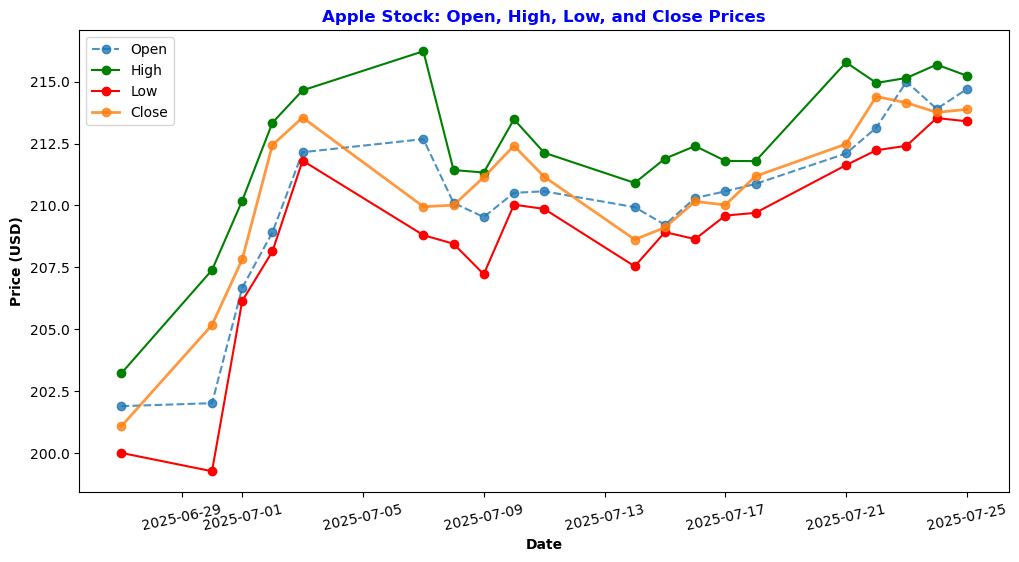

In [95]:
# Plot Open, High, Low, Close
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Open'], label='Open', marker="o", linestyle='--', alpha=0.8)
plt.plot(df.index, df['High'], label='High', marker="o", color='green')
plt.plot(df.index, df['Low'], label='Low', marker="o", color='red')
plt.plot(df.index, df['Close'], label='Close', marker="o", linewidth=2, alpha=0.8)

# Let's add the labels
plt.title('Apple Stock: Open, High, Low, and Close Prices', color="blue", fontweight="bold")
plt.xlabel("Date", fontweight="bold")
plt.ylabel("Price (USD)", fontweight="bold")

plt.xticks(rotation=12)
plt.legend()
plt.show()

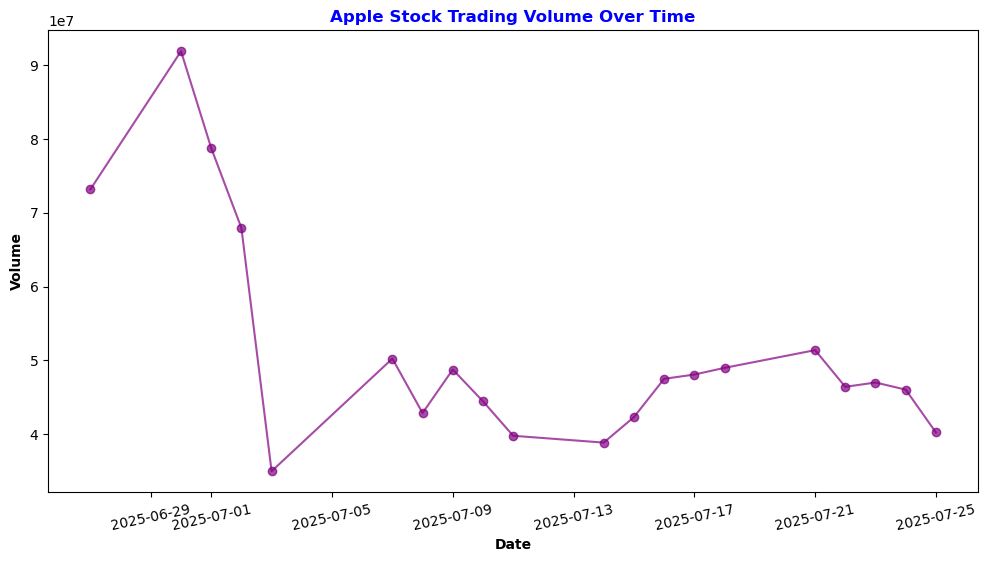

In [96]:
# Volume trend
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Volume'], color='purple', marker="o", alpha=0.7)
plt.title('Apple Stock Trading Volume Over Time', color="blue", fontweight="bold")
plt.xlabel('Date',fontweight="bold")
plt.ylabel('Volume', fontweight="bold")

plt.xticks(rotation=12)
plt.show()

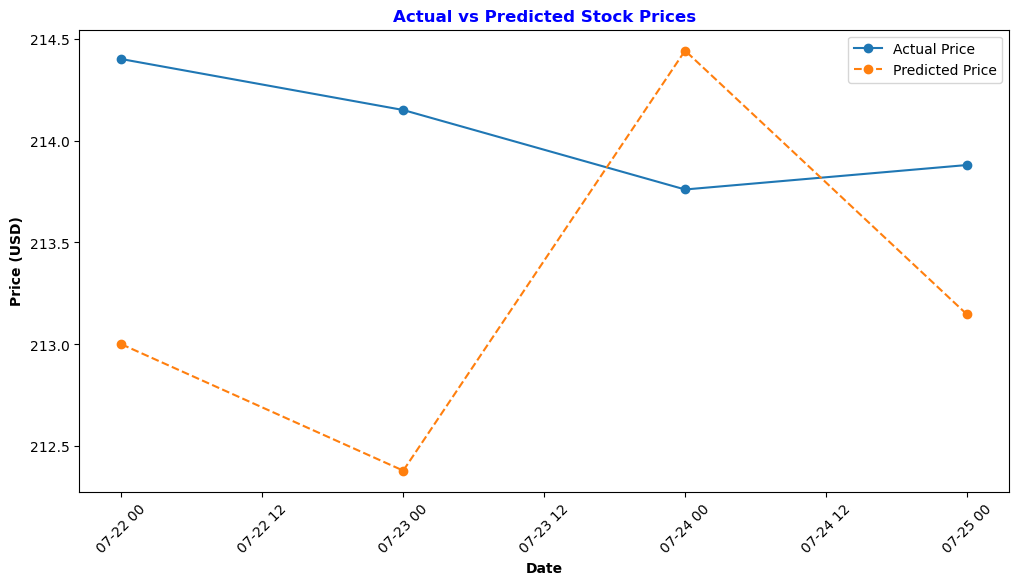

In [97]:
# Assume you have y_test and y_pred
results = pd.DataFrame({'Actual': Y_Test, 'Predicted': Y_pred}, index=Y_Test.index)

plt.figure(figsize=(12, 6))
plt.plot(results.index, results['Actual'], label='Actual Price', marker='o')
plt.plot(results.index, results['Predicted'], label='Predicted Price', linestyle='--', marker='o')
plt.title('Actual vs Predicted Stock Prices', color="blue", fontweight="bold")
plt.xlabel('Date', fontweight="bold")
plt.ylabel('Price (USD)', fontweight="bold")
plt.legend()

plt.xticks(rotation=45)
plt.show()